In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importando os dados necessários 
data_items = pd.read_csv('Arquivos-desafio/olist_order_items_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [3]:
data_sellers = pd.read_csv('Arquivos-desafio/olist_sellers_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [4]:
data_orders = pd.read_csv('Arquivos-desafio/olist_orders_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [5]:
data_payment = pd.read_csv('Arquivos-desafio/olist_order_payments_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [6]:
data_products = pd.read_csv('Arquivos-desafio/olist_products_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [7]:
# Combinando os dados
df_combinado = pd.merge(data_items, data_sellers, on='seller_id')

In [8]:
df_combinado = pd.merge(df_combinado, data_orders, on='order_id')

In [9]:
df_combinado = pd.merge(df_combinado, data_payment, on='order_id')

In [10]:
df_combinado = pd.merge(df_combinado, data_products, on='product_id')

In [11]:
df_combinado.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP,...,2,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,27277,volta redonda,SP,...,1,73.86,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,27277,volta redonda,SP,...,2,83.23,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,27277,volta redonda,SP,...,3,75.07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,27277,volta redonda,SP,...,4,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [12]:
df_combinado['order_id'].value_counts()

order_id
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
68986e4324f6a21481df4e6e89abcf01    24
                                    ..
6de19838b042f2da59ed21bf294b91d0     1
512ba2efae3409f37660ce26199b32aa     1
3eae45e1345a16673017c7c36f18ee34     1
356fd0826eb73e2f62ab842bfe38b4c3     1
b37f75b6989911c687965cee14dc22ca     1
Name: count, Length: 98665, dtype: int64

In [13]:
# Verificando todos os dados de um único pedido para entender como cada coluna se comporta
df_combinado.query('order_id == "895ab968e7bb0d5659d16cd74cd1650c"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
97538,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,25803,tres rios,RJ,...,1,16.70,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0
97539,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,25803,tres rios,RJ,...,1,2.61,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0
97540,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,25803,tres rios,RJ,...,1,16.70,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0
97541,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,25803,tres rios,RJ,...,1,16.70,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0
97542,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,25803,tres rios,RJ,...,1,0.24,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97601,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,89217,joinville,SC,...,1,16.70,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0
97602,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,89217,joinville,SC,...,1,4.61,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0
97603,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,89217,joinville,SC,...,1,16.70,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0
97604,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,89217,joinville,SC,...,1,2.61,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0


In [14]:
# Algumas colunas que contém informações de datas estão como 'object', e deverão ser convertidas em datetime para que possam
# ser analisadas usando datas.
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_item_id                  117601 non-null  int64  
 2   product_id                     117601 non-null  object 
 3   seller_id                      117601 non-null  object 
 4   shipping_limit_date            117601 non-null  object 
 5   price                          117601 non-null  float64
 6   freight_value                  117601 non-null  float64
 7   seller_zip_code_prefix         117601 non-null  int64  
 8   seller_city                    117601 non-null  object 
 9   seller_state                   117601 non-null  object 
 10  customer_id                    117601 non-null  object 
 11  order_status                   117601 non-null  object 
 12  order_purchase_timestamp      

In [15]:
# Convertendo a coluna order_purchase_timestamp para datetime
df_combinado['order_purchase_timestamp'] = pd.to_datetime(df_combinado['order_purchase_timestamp'])

In [16]:
# Não parece haver incosistÊncias na integridade dos valores
df_combinado.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_leng

In [17]:
# Agrupando valores de preços dos pedidos de acordo com o order_id, depois, criando operações de agregamento em diferentes colunas
analise_price = df_combinado.groupby('order_id').agg(
    total_price=('price', 'sum'),
    total_freight=('freight_value', 'sum'),
    total_payment=('payment_value', 'first')  # Pegar apenas o primeiro valor encontrado
)

In [18]:
analise_price['total'] = analise_price['total_price'] + analise_price['total_freight']
analise_price['difference'] = (analise_price['total_payment'] - analise_price['total']).round(2) #verificando a diferença entre o total dos dos valores

In [19]:
# Há muitos casos com diferenças significativas de valores, o que pode sugerir que tenha havido impostos adicionais, custos operacionais, taxas de importação enter outros...
(analise_price[analise_price['difference'] > 0])

,total_price,total_freight,total_payment,total,difference
order_id,,,,,
005d9a5423d47281ac463a968b3936fb,99.97,45.28,145.26,145.25,0.01
00789ce015e7e5791c7914f32bb4fad4,154.00,14.83,190.81,168.83,21.98
016726239765c18f66826453f39c64e3,219.99,15.14,265.77,235.13,30.64
01e51b7c3025655646143d09b911e1d7,19.00,14.10,35.02,33.10,1.92
028aa7c930356788f861ed1b7f984819,39.90,17.63,62.94,57.53,5.41
...,...,...,...,...,...
faf132fb35b3b3b533a67efbd6e7c02d,89.90,25.12,130.01,115.02,14.99
fb3cf8c9eb2412b0edc0a00a8f43a869,330.99,90.39,421.39,421.38,0.01
fb7b22bb2a29860909a25f91510e4292,409.70,37.19,446.90,446.89,0.01


In [20]:
df_difference = (analise_price[analise_price['difference'] < 0])

In [21]:
# Notei que houve uma grande diferença entre os valores quando considera valores negativos
df_difference['difference'].sort_values()

order_id
fa65dad1b0e818e3ccc5cb0e39231352   -13215.69
4bfcba9e084f46c8e3cb49b0fa6e6159   -11061.40
465c2e1bee4561cb39e0db8c5993aafc   -10512.25
f489949dbe23cf9313deb342913ece0c   -10005.22
9de73f3e6157169ad6c32b9f313c7dcb    -7933.44
                                      ...   
8a4c749f6b6350f68770c00405f8612a       -0.01
314313f56bd89ca04231bb9378291806       -0.01
30a022caf1ba5b86f28124ed216c859f       -0.01
2bedc0d7231e504d0476c606108e7e73       -0.01
61a4e749e6975384980e883fc5653d8b       -0.01
Name: difference, Length: 3139, dtype: float64

In [22]:
''' É de um pedido que não foi entregue até a data limite de armazenamento dos dados, onde foi usado Voucher para pagar todo 
o pedido, portanto não aparenta ter algo errado com os dados ou as consultas até o momento.
'''
df_combinado.query('order_id == "fa65dad1b0e818e3ccc5cb0e39231352"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
70045,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,66.02,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70046,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,29.16,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70047,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,3.71,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70048,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,1.08,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70049,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,12.86,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70050,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,8.51,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70051,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,3.68,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70052,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,0.66,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70053,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,5.02,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0
70054,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,87140,paincandu,PR,...,1,4.03,ferramentas_jardim,41.0,3544.0,1.0,16400.0,100.0,30.0,30.0


In [23]:
# visualizando valores na coluna 'order_status' - para a análise de receita vou considerar apenas os pedidos que constam delivered
df_combinado['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [24]:
# Filtrar apenas os pedidos entregues
df_combinado = df_combinado[df_combinado['order_status'] == 'delivered']

In [25]:
# Somando as vendas e atribuindo aos seus respectivos vendedores
sellers_sales = df_combinado.groupby('seller_id')['payment_value'].sum()

In [26]:
sellers_sales

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     2748.06
001cca7ae9ae17fb1caed9dfb1094831    47557.95
002100f778ceb8431b7a1020ff7ab48f     2412.64
003554e2dce176b5555353e4f3555ac8      139.38
004c9cd9d87a3c30c522c48c4fc07416    27640.43
                                      ...   
ffc470761de7d0232558ba5e786e57b7     2382.53
ffdd9f82b9a447f6f8d4b91554cc7dd3     3607.52
ffeee66ac5d5a62fe688b9d26f83f534     2259.55
fffd5413c0700ac820c7069d66d98c89    12063.53
ffff564a4f9085cd26170f4732393726      474.35
Name: payment_value, Length: 2970, dtype: float64

In [27]:
# Aqui posso confirmar que os resultados dos valores encontrados são compatíveis com a somatória dos pedidos e atribuídos corretamente
# ao seller_id
df_combinado.query('seller_id == "ffff564a4f9085cd26170f4732393726"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
80816,021d08e4057e5b6414c8d2f69f4f72a0,1,a819714dd23a6ac18b1be2b13686017b,ffff564a4f9085cd26170f4732393726,2016-10-17 19:01:41,51.5,14.53,13070,campinas,SP,...,1,66.03,automotivo,54.0,393.0,2.0,100.0,17.0,17.0,17.0
80820,2fbb05b3ee700e1897b9fa501e416005,1,de6517dda8e49774f58c07f80abc8d7a,ffff564a4f9085cd26170f4732393726,2016-10-27 16:29:16,69.0,11.94,13070,campinas,SP,...,3,80.94,market_place,56.0,975.0,1.0,950.0,26.0,17.0,24.0
80824,616b813dbea8acc9de0ca0380cd89b83,1,dbd024d4182504993ad1e3cd2ee9d9e9,ffff564a4f9085cd26170f4732393726,2017-01-26 19:04:32,29.4,16.05,13070,campinas,SP,...,4,45.45,automotivo,38.0,231.0,3.0,100.0,17.0,17.0,17.0
80825,df537c849af44beef86a7ef7de12126a,1,dbd024d4182504993ad1e3cd2ee9d9e9,ffff564a4f9085cd26170f4732393726,2017-01-29 21:48:41,29.4,10.96,13070,campinas,SP,...,1,40.36,automotivo,38.0,231.0,3.0,100.0,17.0,17.0,17.0
80827,7ab9c55c59eaeea579d047e2d8aaed81,1,c4b925e40f11289063a854c47aaef129,ffff564a4f9085cd26170f4732393726,2017-02-01 13:04:20,11.5,10.96,13070,campinas,SP,...,1,22.46,eletronicos,39.0,286.0,3.0,100.0,20.0,20.0,20.0
80828,81251f18621a822ad5b09593dfee4fc9,1,c4b925e40f11289063a854c47aaef129,ffff564a4f9085cd26170f4732393726,2017-01-31 14:17:21,11.5,10.96,13070,campinas,SP,...,2,22.46,eletronicos,39.0,286.0,3.0,100.0,20.0,20.0,20.0
80833,94b35c9542f07ad80b3367f9051b63af,1,24905035adec59d4ab5a46c13973ef17,ffff564a4f9085cd26170f4732393726,2017-02-03 12:38:48,47.5,26.61,13070,campinas,SP,...,1,74.11,automotivo,52.0,107.0,3.0,100.0,20.0,20.0,20.0
80837,fdb3ef83ea6f7bef7d13bdd9b38da661,1,cb17b798ba889575385281b7ec2fc22b,ffff564a4f9085cd26170f4732393726,2017-01-27 21:09:40,109.2,13.34,13070,campinas,SP,...,2,122.54,automotivo,49.0,1208.0,4.0,1300.0,20.0,20.0,20.0


In [28]:
# Filtrando os 10 maiores sellers 
top_sellers = sellers_sales.sort_values(ascending=False).head(10)

In [29]:
top_sellers

seller_id
7c67e1448b00f6e969d365cea6b010ab    505437.16
1025f0e2d44d7041d6cf58b6550e0bfa    306000.35
4a3ca9315b744ce9f8e9374361493884    295830.76
1f50f920176fa81dab994f9023523100    289861.38
53243585a1d6dc2643021fd1853d8905    279843.42
da8622b14eb17ae2831f4ac5b9dab84a    271733.78
4869f7a5dfa277a7dca6462dcf3b52b2    261532.48
955fee9216a65b617aa5c0531780ce60    232136.06
fa1c13f2614d7b5c4749cbc52fecda94    203262.00
6560211a19b47992c3666cc44a7e94c0    176097.10
Name: payment_value, dtype: float64

In [30]:
# Filtrando os piores sellers
bottom_sellers = sellers_sales.sort_values(ascending=True).head(10)

In [31]:
bottom_sellers

seller_id
77128dec4bec4878c37ab7d6169d6f26    15.22
4965a7002cca77301c82d3f91b82e1a9    16.36
702835e4b785b67a084280efca355756    18.56
ad14615bdd492b01b0d97922e87cb87f    19.21
3ac588cd562971392504a9e17130c40b    19.29
c1dde11f12d05c478f5de2d7319ad3b2    19.89
cc1f04647be106ba74e62b21f358af25    20.19
b5f0712d22a873b6797ab6cc65c3fcba    21.28
7ab0dd5487bab2dc835337b244f689fb    23.46
c18309219e789960add0b2255ca4b091    24.00
Name: payment_value, dtype: float64

In [32]:
# Decidi que queria analisar as categorias que ocorrem entre os vendedores detentores de maior receita
top_sellers_category = pd.merge(top_sellers, df_combinado, on='seller_id', how='left')

In [33]:
top_sellers_category

,seller_id,payment_value_x,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,...,payment_installments,payment_value_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7c67e1448b00f6e969d365cea6b010ab,505437.16,ddb33b0aa1ca6227208f0ca0564f0696,1,cbdb9bf611328898bd4b32a384506b3a,2018-05-02 22:15:21,89.98,51.48,8577,itaquaquecetuba,...,10,391.66,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
1,7c67e1448b00f6e969d365cea6b010ab,505437.16,3311b1573fa138150d43e80f46c7d1cb,1,cbdb9bf611328898bd4b32a384506b3a,2018-04-13 18:08:30,89.98,27.48,8577,itaquaquecetuba,...,1,117.46,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
2,7c67e1448b00f6e969d365cea6b010ab,505437.16,35fd272b7bfd7824349c5d0defad43ed,1,cbdb9bf611328898bd4b32a384506b3a,2017-11-26 22:15:51,99.98,57.37,8577,itaquaquecetuba,...,6,157.35,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
3,7c67e1448b00f6e969d365cea6b010ab,505437.16,5dd4ba32ddd49be56001b6436d8ef44c,1,cbdb9bf611328898bd4b32a384506b3a,2018-06-01 16:31:20,89.98,20.67,8577,itaquaquecetuba,...,1,110.65,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
4,7c67e1448b00f6e969d365cea6b010ab,505437.16,75c02a4e1587058ae9cc570985965ca1,1,cbdb9bf611328898bd4b32a384506b3a,2018-04-29 22:51:25,89.98,27.48,8577,itaquaquecetuba,...,3,117.46,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,6560211a19b47992c3666cc44a7e94c0,176097.10,e563afc47cb5fafb2ed8869e9e822e38,1,bc7f7a995ff963c23da53e0856e8b6a3,2018-03-22 15:55:23,19.00,22.85,5849,sao paulo,...,6,93.70,fashion_bolsas_e_acessorios,59.0,63.0,4.0,150.0,16.0,2.0,11.0
14415,6560211a19b47992c3666cc44a7e94c0,176097.10,e7541673fccb361d1221c62bb45ad1cb,1,45dc67310ca176b5df98262187d7bf41,2017-09-19 20:10:21,59.00,16.85,5849,sao paulo,...,1,75.85,relogios_presentes,57.0,864.0,8.0,200.0,16.0,2.0,11.0
14416,6560211a19b47992c3666cc44a7e94c0,176097.10,ef85abe875a2c11ed5321f610f7afa28,1,90111fe8e74ecb8fb94fa93f76efbfe9,2017-05-03 16:50:17,50.00,8.72,5849,sao paulo,...,1,58.72,fashion_bolsas_e_acessorios,45.0,135.0,3.0,200.0,16.0,2.0,11.0
14417,6560211a19b47992c3666cc44a7e94c0,176097.10,f7ef6a6afaeb05b9f32f440bf4ef732f,3,69c1a709ba2ac6511ef8553b93074ec1,2017-10-05 20:14:17,58.00,17.65,5849,sao paulo,...,3,209.94,fashion_bolsas_e_acessorios,45.0,123.0,2.0,300.0,16.0,2.0,11.0


In [34]:
# Agrupando por categoria e contando vendas
if 'product_category_name' in top_sellers_category.columns:
    category_sales = top_sellers_category.groupby('product_category_name').agg(
        total_sales=('payment_value_y', 'sum'),
        number_of_orders=('order_id', 'nunique')
    ).reset_index()
category_sales

,product_category_name,total_sales,number_of_orders
0,agro_industria_e_comercio,449.43,12
1,alimentos,796.27,7
2,artes,1067.70,11
3,audio,14040.87,86
4,automotivo,2166.00,21
5,bebes,22137.67,35
6,beleza_saude,35623.69,371
7,brinquedos,5551.88,52
8,cama_mesa_banho,497325.17,2499
9,casa_conforto,38566.84,223


In [35]:
category_sales.sort_values(by='total_sales', ascending=False)


,product_category_name,total_sales,number_of_orders
33,relogios_presentes,575702.52,2979
8,cama_mesa_banho,497325.17,2499
28,moveis_escritorio,470174.59,887
27,moveis_decoracao,366328.12,1365
22,ferramentas_jardim,278963.59,1434
31,pcs,184257.40,143
35,telefonia,96752.97,209
37,utilidades_domesticas,75918.11,175
9,casa_conforto,38566.84,223
6,beleza_saude,35623.69,371


In [36]:
# Filtrando a categoria predominante em um seller específico
seller_1 = '7c67e1448b00f6e969d365cea6b010ab'

In [37]:
filter_seller = df_combinado[df_combinado['seller_id'] == seller_1]

In [38]:
filter_seller

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5913,ddb33b0aa1ca6227208f0ca0564f0696,1,cbdb9bf611328898bd4b32a384506b3a,7c67e1448b00f6e969d365cea6b010ab,2018-05-02 22:15:21,89.98,51.48,8577,itaquaquecetuba,SP,...,10,391.66,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
5914,3311b1573fa138150d43e80f46c7d1cb,1,cbdb9bf611328898bd4b32a384506b3a,7c67e1448b00f6e969d365cea6b010ab,2018-04-13 18:08:30,89.98,27.48,8577,itaquaquecetuba,SP,...,1,117.46,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
5915,35fd272b7bfd7824349c5d0defad43ed,1,cbdb9bf611328898bd4b32a384506b3a,7c67e1448b00f6e969d365cea6b010ab,2017-11-26 22:15:51,99.98,57.37,8577,itaquaquecetuba,SP,...,6,157.35,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
5916,5dd4ba32ddd49be56001b6436d8ef44c,1,cbdb9bf611328898bd4b32a384506b3a,7c67e1448b00f6e969d365cea6b010ab,2018-06-01 16:31:20,89.98,20.67,8577,itaquaquecetuba,SP,...,1,110.65,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
5917,75c02a4e1587058ae9cc570985965ca1,1,cbdb9bf611328898bd4b32a384506b3a,7c67e1448b00f6e969d365cea6b010ab,2018-04-29 22:51:25,89.98,27.48,8577,itaquaquecetuba,SP,...,3,117.46,moveis_escritorio,26.0,945.0,1.0,12700.0,55.0,70.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14096,fedcd9f7ccdc8cba3a18defedd1a5547,2,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,2017-10-05 17:44:41,79.99,22.88,8577,itaquaquecetuba,SP,...,1,9.54,moveis_escritorio,46.0,1058.0,1.0,5200.0,45.0,54.0,15.0
14097,fedcd9f7ccdc8cba3a18defedd1a5547,2,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,2017-10-05 17:44:41,79.99,22.88,8577,itaquaquecetuba,SP,...,1,11.12,moveis_escritorio,46.0,1058.0,1.0,5200.0,45.0,54.0,15.0
14098,fedcd9f7ccdc8cba3a18defedd1a5547,2,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,2017-10-05 17:44:41,79.99,22.88,8577,itaquaquecetuba,SP,...,1,26.94,moveis_escritorio,46.0,1058.0,1.0,5200.0,45.0,54.0,15.0
14099,fedcd9f7ccdc8cba3a18defedd1a5547,2,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,2017-10-05 17:44:41,79.99,22.88,8577,itaquaquecetuba,SP,...,1,11.78,moveis_escritorio,46.0,1058.0,1.0,5200.0,45.0,54.0,15.0


In [39]:
if 'product_category_name' in filter_seller.columns:
    category_sales = filter_seller.groupby('product_category_name').agg(
        total_sales=('payment_value', 'sum'),  
        number_of_orders=('order_id', 'nunique')
    ).reset_index()

In [40]:
category_sales = category_sales.sort_values(by='total_sales', ascending=False)[['product_category_name', 'total_sales', 'number_of_orders']]

In [41]:
category_sales

,product_category_name,total_sales,number_of_orders
4,moveis_escritorio,468454.02,882
3,moveis_decoracao,22969.11,67
5,moveis_sala,7310.29,9
2,esporte_lazer,5594.71,14
1,bebes,773.69,3
0,automotivo,335.34,3


In [42]:
''' Não consegui pensar em uma boa forma de apresentar os dados de categoria associados a cada seller em um gráfico
então prossegui apenas com a informação de maiores e piores sellers, e categorias que geraram mais receitas entre
os 10 maiores sellers ( sem filtrar com mais especificidades ).'''  # ERRATA
# Optei por filtrar apenas as categorias que contribuiram para o melhor seller, pois ele se destacou entre os outros


' Não consegui pensar em uma boa forma de apresentar os dados de categoria associados a cada seller em um gráfico\nentão prossegui apenas com a informação de maiores e piores sellers, e categorias que geraram mais receitas entre\nos 10 maiores sellers ( sem filtrar com mais especificidades ).'

In [43]:
# Precisei transformar o indice da serie top_sellers e bottom em uma coluna regular, transformando a series em df 
top_sellers = top_sellers.reset_index()
top_sellers.columns = ['seller_id', 'payment']

In [44]:
bottom_sellers = bottom_sellers.reset_index()
bottom_sellers.columns = ['seller_id', 'payment']

In [45]:
# Reaproveitei essa parte do replacement que usei no Receita por Categoria 12 meses
replace_categorias = [category_sales]
replace = {
    'cama_mesa_banho': 'Cama, mesa e banho',
    'relogios_presentes': 'Relógios e presentes',
    'esporte_lazer': 'Esportes e lazer',
    'informatica_acessorios': 'Informática e acessórios',
    'beleza_saude': 'Saúde e beleza',
    'casa_conforto_2': 'Casa e conforto 2',
    'fashion_esporte': 'Fashion e esporte',
    'musica': 'Música',
    'fashion_roupa_infanto_juvenil': 'Fashion roupas infanto juvenil',
    'cds_dvds_musicais': 'Cds e Dvds musicais',
    'dvds_blu_ray': 'Dvds Blu-Ray',
    'flores': 'Flores',
    'pcs': 'Computadores',
    'telefonia_fixa': 'Telefonia Fixa',
    'moveis_decoracao': 'Móveis e decoração',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Móveis',
    'artes_e_artesanato': 'Artes e Artesanatos',
    'tablets_impressao_imagem': 'Tablets e Impressão',
    'moveis_escritorio': 'Móveis de Escritório',
    'ferramentas_jardim': 'Ferramentas e Jardim',
    'utilidades_domesticas': 'Útilidades domésticas',
    'fashion_roupa_feminina': 'Roupas Femininas',
    'automotivo': 'Automotivo',
}

for df in replace_categorias:
    if 'product_category_name' in df.columns:
        df['product_category_name'] = df['product_category_name'].replace(replace)

# **Resumo e considerações finais**

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

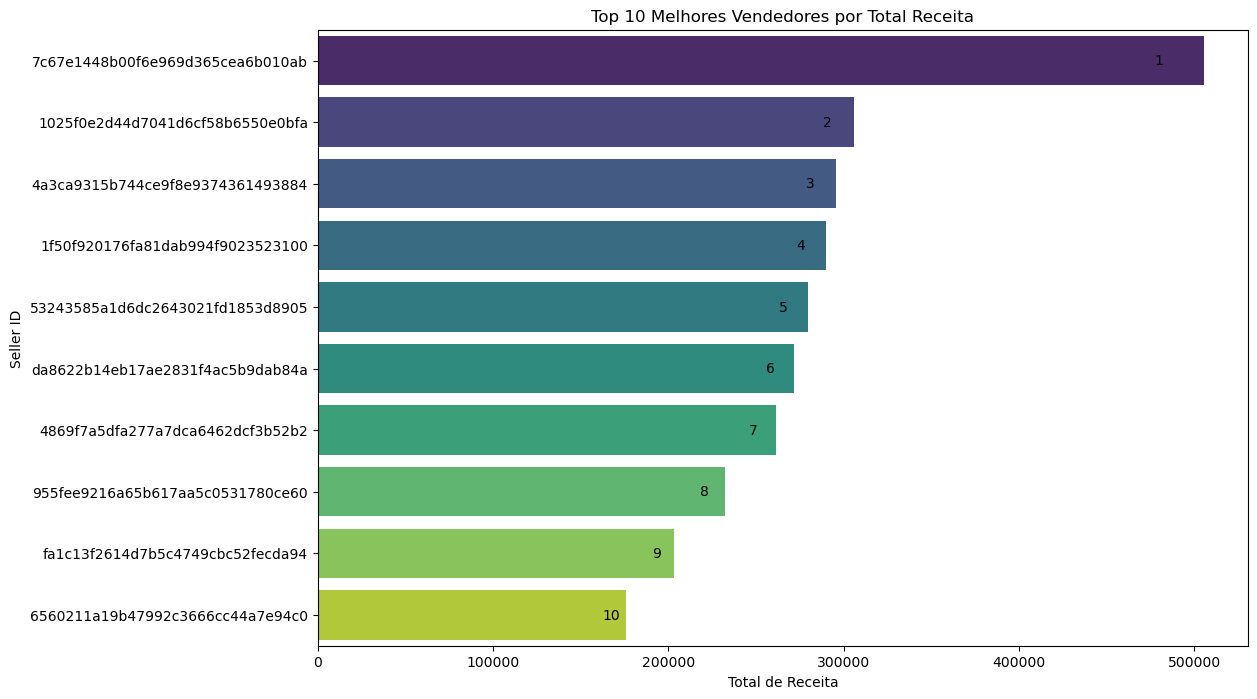

' Segue abaixo, os 10 melhores vendedores considerando o Total de receita. Há um vendedor que se destacou mais que os outros,\nao analisarmos quais foram as categorias que mais contribuiram para suas vendas, podemos destacar Móveis de escritório, como \nmostrado em outro gráfico abaixo.\n'

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='payment', y='seller_id', data=top_sellers, palette='viridis')
plt.xlabel('Total de Receita')
plt.ylabel('Seller ID')
plt.title('Top 10 Melhores Vendedores por Total Receita')

# loop sobre cada barra para adicionar a posição de cada vendedor
for i, p in enumerate(ax.patches):  
    width = p.get_width()  
    ax.text(width - (width * 0.05),      
            p.get_y() + p.get_height() / 2, 
            f'{i + 1}',            
            ha='center',          
            va='center') 
plt.show()

''' Segue abaixo, os 10 melhores vendedores considerando o Total de receita. Há um vendedor que se destacou mais que os outros,
ao analisarmos quais foram as categorias que mais contribuiram para suas vendas, podemos destacar Móveis de escritório, como 
mostrado em outro gráfico abaixo.
'''

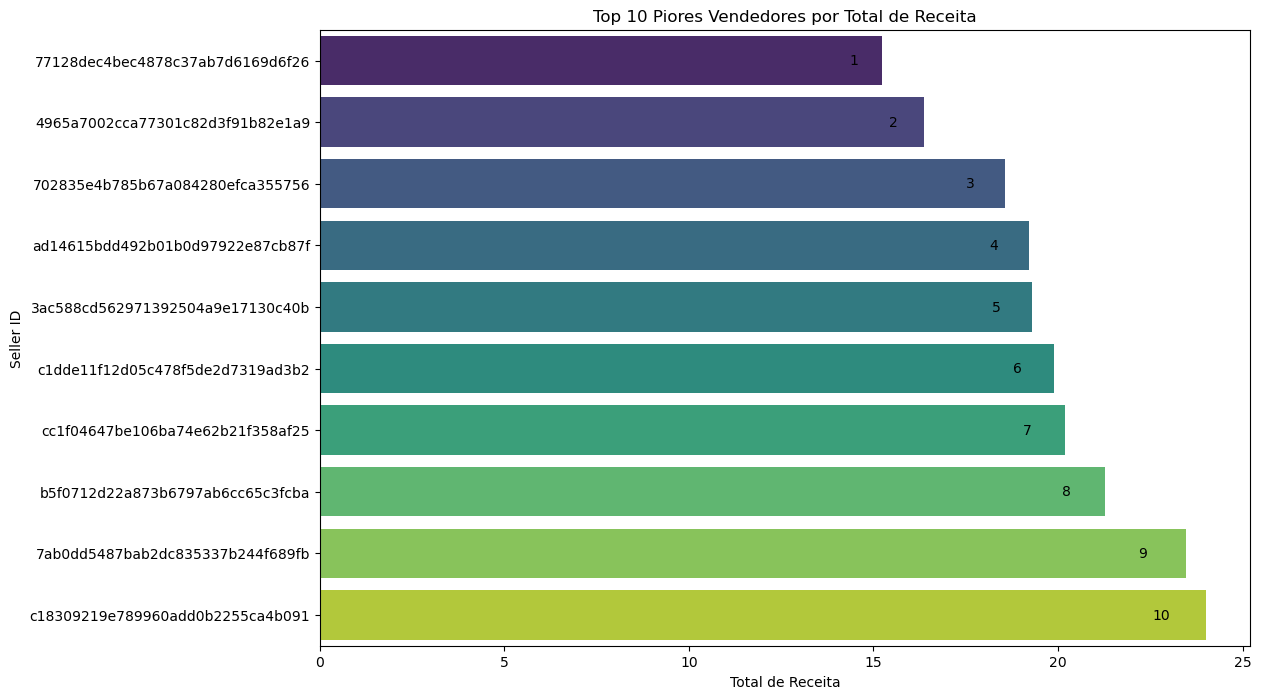

In [48]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='payment', y='seller_id', data=bottom_sellers, palette='viridis')
plt.xlabel('Total de Receita')
plt.ylabel('Seller ID')
plt.title('Top 10 Piores Vendedores por Total de Receita')
# loop sobre cada barra para adicionar a posição de cada vendedor
for i, p in enumerate(ax.patches):  
    width = p.get_width()  
    ax.text(width - (width * 0.05),      
            p.get_y() + p.get_height() / 2, 
            f'{i + 1}',            
            ha='center',          
            va='center') 
plt.show()

# Os piores vendedodores considerando o total de receita.

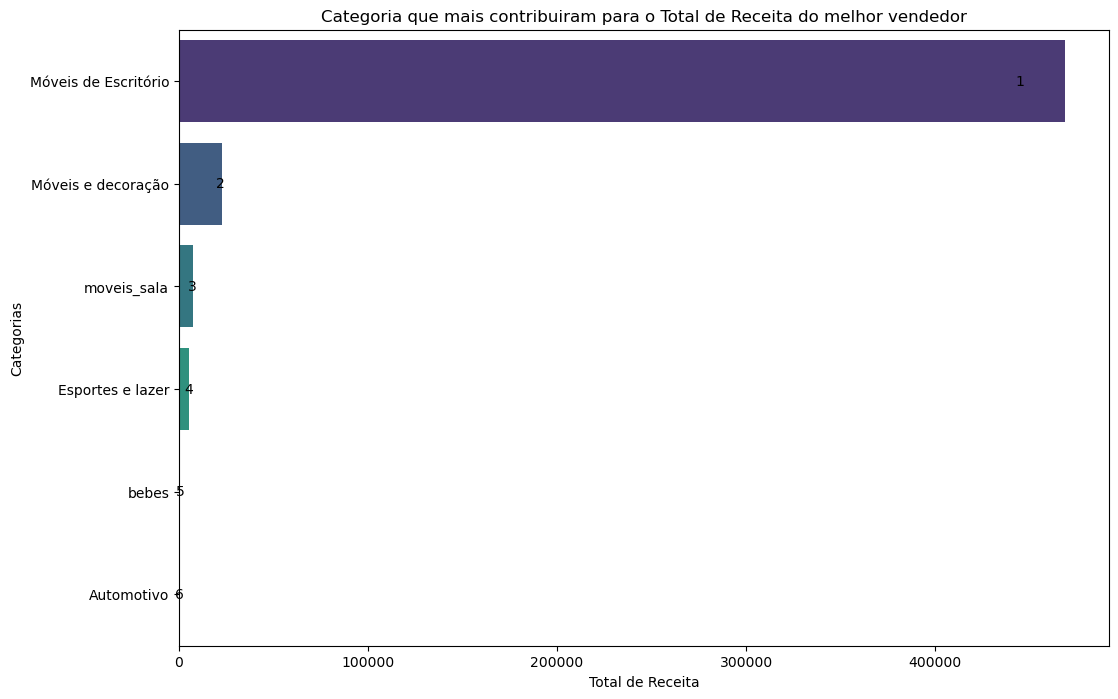

' As Categorias que contribuiram para a receita do melhor vendedor da nossa análise é majoritariamente Móveis de escritório. \nEmbora esta não seja a que mais contribuiu para o total de receita geral entre nossos vendedores.'

In [49]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='total_sales', y='product_category_name', data=category_sales, palette='viridis')
plt.xlabel('Total de Receita')
plt.ylabel('Categorias')
plt.title('Categoria que mais contribuiram para o Total de Receita do melhor vendedor')
# loop sobre cada barra para adicionar a posição de cada vendedor
for i, p in enumerate(ax.patches):  
    width = p.get_width()  
    ax.text(width - (width * 0.05),      
            p.get_y() + p.get_height() / 2, 
            f'{i + 1}',            
            ha='center',          
            va='center') 
plt.show()

''' As Categorias que contribuiram para a receita do melhor vendedor da nossa análise é majoritariamente Móveis de escritório. 
Embora esta não seja a que mais contribuiu para o total de receita geral entre nossos vendedores.'''